# Import Libraries

In [1]:
#import libraries as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Load the Data

In [2]:
#Load data as csv file
nbadf = pd.read_csv("C:/Users/jacks/OneDrive/Desktop/External Data Analyst Learning/Data Analyst Roadmap/Projects/NBA Players Shooting/nba_players_shooting.csv")
nbadf

,INDEX,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
0,0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE
...,...,...,...,...,...,...,...
771,771,Trae Young,23.952742,15.324875,"(25, 29)",Russell Westbrook,MISSED
772,772,Trae Young,6.221766,30.756008,"(25, 29)",Seth Curry,MISSED
773,773,Trae Young,16.397467,27.660323,"(25, 29)",Chris Paul,MISSED
774,774,Trae Young,-11.257104,30.713097,"(25, 29)",Russell Westbrook,MISSED


# Explore and Clean Data

In [3]:
nbadf.head()

,INDEX,SHOOTER,X,Y,RANGE,DEFENDER,SCORE
0,0,Seth Curry,-3.808987,5.583621,"(0, 4)",Chris Paul,MADE
1,1,Seth Curry,-0.104279,5.919138,"(0, 4)",Trae Young,MADE
2,2,Seth Curry,-0.525864,8.912239,"(0, 4)",Trae Young,MADE
3,3,Seth Curry,-0.790616,7.503782,"(0, 4)",Chris Paul,MADE
4,4,Seth Curry,2.119074,5.320534,"(0, 4)",Trae Young,MADE


In [4]:
nbadf.describe()

,INDEX,X,Y
count,776.000000,776.000000,776.000000
mean,387.500000,0.492154,15.400099
std,224.156196,12.934870,8.009152
min,0.000000,-24.856870,5.008911
25%,193.750000,-8.227266,8.151474
50%,387.500000,0.318647,13.665261
75%,581.250000,9.782513,21.175087
max,775.000000,24.767551,33.853913


In [5]:
#Check for null values
nbadf.isnull().sum()

INDEX       0
SHOOTER     0
X           0
Y           0
RANGE       0
DEFENDER    0
SCORE       0
dtype: int64

In [6]:
#Glimpse of the variables
variables = pd.DataFrame(columns=['Variable','Values','Number of Unique Values', 'Data Type'])

for i, var in enumerate(nbadf.columns):
    variables.loc[i] = [var, nbadf[var].unique().tolist(), nbadf[var].nunique(), nbadf[var].dtype]

variables

,Variable,Values,Number of Unique Values,Data Type
0,INDEX,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",776,int64
1,SHOOTER,"[Seth Curry, Chris Paul, Russell Westbrook, Tr...",4,object
2,X,"[-3.808987264612848, -0.1042785818707121, -0.5...",719,float64
3,Y,"[5.5836210329779306, 5.919137999129865, 8.9122...",776,float64
4,RANGE,"[(0, 4), (5, 9), (10, 14), (15, 19), (20, 24),...",6,object
5,DEFENDER,"[Chris Paul, Trae Young, Russell Westbrook, Se...",4,object
6,SCORE,"[MADE, MISSED]",2,object


# Additions for the Data

In [7]:
#Finding the exact range with pythagorean theorem
nbadf['Exact_Range'] = np.sqrt(nbadf.X**2 + nbadf.Y**2)

#Check for correctness
nbadf[['X', 'Y','RANGE','Exact_Range']]

,X,Y,RANGE,Exact_Range
0,-3.808987,5.583621,"(0, 4)",6.759083
1,-0.104279,5.919138,"(0, 4)",5.920056
2,-0.525864,8.912239,"(0, 4)",8.927740
3,-0.790616,7.503782,"(0, 4)",7.545318
4,2.119074,5.320534,"(0, 4)",5.727002
...,...,...,...,...
771,23.952742,15.324875,"(25, 29)",28.435640
772,6.221766,30.756008,"(25, 29)",31.379012
773,16.397467,27.660323,"(25, 29)",32.155410
774,-11.257104,30.713097,"(25, 29)",32.711110


In [8]:
#Creating a Basketball Court Diagram for Visualizations
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    #if no axes object is provided, grab the current one
    if ax is None:
        ax = plt.gca()

    #creating the basketball court

    #Basketball Hoop
    hoop = Circle((0, 0), radius=0.75, linewidth=lw, color=color, fill=False)
    
    #Backboard
    backboard = Rectangle((-3, -1.25), 6, -0.1, linewidth=lw, color=color)

    #The Paint
    #Paint Outer Box
    outer_box = Rectangle((-8, -4.75), 16, 19, linewidth=lw, color=color, fill=False)
    #Paint Inner Box
    inner_box = Rectangle((-6, -4.75), 12, 19, linewidth=lw, color=color, fill=False)
    #Restricted Zone
    restricted_zone = Arc((0, 0), 8, 8, theta1=0, theta2=-180, linewidth=lw, color=color)

    #Free Throw
    #Top FT Arc
    FT_top_arc = Arc((0, 14.25), 16, 12, theta1=0, theta2=180, linewidth=lw, color=color, linestyle='dashed')
    #Bottom FT Arc
    FT_bottom_arc = Arc((0, 14.25), 16, 12, theta1=18, theta2=0, linewidth=lw, color=color, linestyle='dashed')

    #Center Court
    center_outer_arc = Arc((0, 42.25), 16, 12, theta1=18, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 42.25), 6, 4, theta1=18, theta2=0, linewidth=lw, color=color)

    #Three Point Line
    #Top Arc
    three_arc = Arc((0,0), 47.8, 47.8, theta1=22.5, theta2=-202.5, linewidth=lw, color=color)
    #Corner Lines
    corner_line_a = Rectangle((-22, -4.75), 0, 14, linewidth=lw, color=color)
    corner_line_b = Rectangle((22, -4.75), 0, 14, linewidth=lw, color=color)

    #List of all court elements for plotting
    court_elements = [hoop, backboard, outer_box, inner_box, restricted_zone, FT_top_arc, FT_bottom_arc, center_outer_arc, center_inner_arc, three_arc,
                      corner_line_a, corner_line_b]

    if outer_lines:
        #Draw half court lines, baselines, and out of bounds lines
        outer_lines = Rectangle((-25, -4.75), 50, 47, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    #add court elements to axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

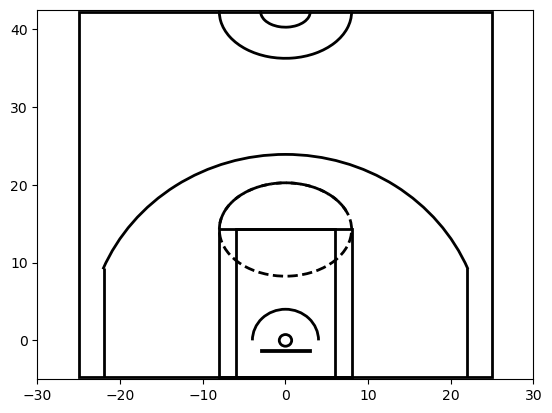

In [9]:
#plot test of basketball court
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.show()

In [10]:
#Labeling the shooters and the shots they made
#Shooters
Seth_Curry_S = nbadf[nbadf['SHOOTER']== 'Seth Curry']
Seth_Curry_Made = Seth_Curry_S[Seth_Curry_S['SCORE'] == 'MADE']

Chris_Paul_S = nbadf[nbadf['SHOOTER'] == 'Chris Paul']
Chris_Paul_Made = Chris_Paul_S[Chris_Paul_S['SCORE'] == 'MADE']

Russell_Westbrook_S = nbadf[nbadf['SHOOTER'] == 'Russell Westbrook']
Russell_Westbrook_Made = Russell_Westbrook_S[Russell_Westbrook_S['SCORE'] == 'MADE']

Trae_Young_S = nbadf[nbadf['SHOOTER'] == 'Trae Young']
Trae_Young_Made = Trae_Young_S[Trae_Young_S['SCORE'] == 'MADE']

#Labeling the defenders and the shots they defended
#Defenders
Seth_Curry_D = nbadf[nbadf['DEFENDER']== 'Seth Curry']
Seth_Curry_Defended= Seth_Curry_D[Seth_Curry_D['SCORE']== 'MISSED']

Chris_Paul_D = nbadf[nbadf['DEFENDER'] == 'Chris Paul']
Chris_Paul_Defended= Chris_Paul_D[Chris_Paul_D['SCORE']== 'MISSED']

Russell_Westbrook_D = nbadf[nbadf['DEFENDER'] == 'Russell Westbrook']
Russell_Westbrook_Defended= Russell_Westbrook_D[Russell_Westbrook_D['SCORE']== 'MISSED']

Trae_Young_D = nbadf[nbadf['DEFENDER'] == 'Trae Young']
Trae_Young_Defended= Trae_Young_D[Trae_Young_D['SCORE']== 'MISSED']

In [11]:
#Defining variables for visualizations per player
#Seth Curry
s = Seth_Curry_S.query("SCORE == 'MADE'")
Seth_Curry_Defended['Total Defense'] = Seth_Curry_Defended['DEFENDER'].count()
Seth_Curry_Made['Total score'] = Seth_Curry_Made['SCORE'].count()

#Chris Paul
c = Chris_Paul_S.query("SCORE == 'MADE'")
Chris_Paul_Defended['Total Defense'] = Chris_Paul_Defended['DEFENDER'].count()
Chris_Paul_Made['Total score'] = Chris_Paul_Made['SCORE'].count()

#Russell Westbrook
r = Russell_Westbrook_S.query("SCORE == 'MADE'")
Russell_Westbrook_Defended['Total Defense'] = Russell_Westbrook_Defended['DEFENDER'].count()
Russell_Westbrook_Made['Total score'] = Russell_Westbrook_Made['SCORE'].count()

#Trae Young
t = Trae_Young_S.query("SCORE == 'MADE'")
Trae_Young_Defended['Total Defense'] = Trae_Young_Defended['DEFENDER'].count()
Trae_Young_Made['Total score'] = Trae_Young_Made['SCORE'].count()

#Adjusts for True Y coordinate on Basketball Court Diagram
trueY = nbadf['Y'] - 5


C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\1331812522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seth_Curry_Defended['Total Defense'] = Seth_Curry_Defended['DEFENDER'].count()
C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\1331812522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seth_Curry_Made['Total score'] = Seth_Curry_Made['SCORE'].count()
C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\1331812522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

### Who is the best shooter?

C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\2906443646.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values


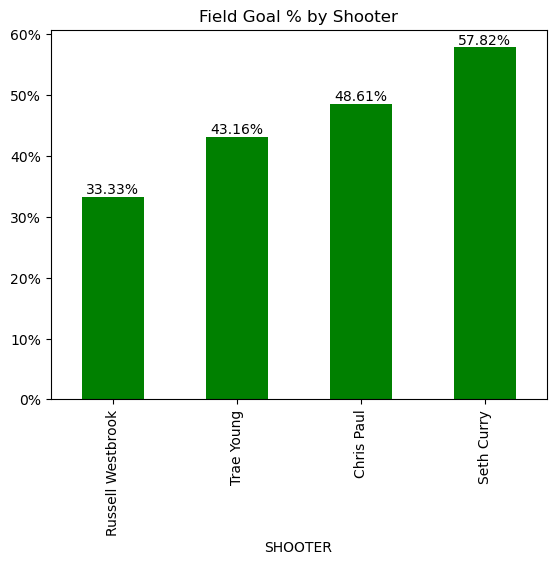

In [12]:
#Calculate Best Field Goal %
avg_field_goal_pct = (nbadf
 .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values
 .groupby('SHOOTER')               #group by Shooter
 .SCORE                            #grab the score
 .mean()                           #calculate the mean
 .sort_values()                    #sort the means
)

#adding Field Goal % as a column to the data frame
nbadf['FGpct'] = avg_field_goal_pct                             

#Plotting the Bar Graph
bar_plot = avg_field_goal_pct.plot(kind='bar', color = ['g'])   #plot a bar graph of the sorted means

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1)) #set y axis as percentage
plt.title("Field Goal % by Shooter")                            #set title

#Annotating the bars
for a in bar_plot.patches:
    txt = np.round(a.get_height() * 100, decimals=2)
    anot = txt.astype('str')
    bar_plot.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10,)

In [13]:
#count of how many shots per shooter
count_shooter = nbadf["SHOOTER"].value_counts()
count_shooter

SHOOTER
Trae Young           329
Chris Paul           216
Seth Curry           147
Russell Westbrook     84
Name: count, dtype: int64

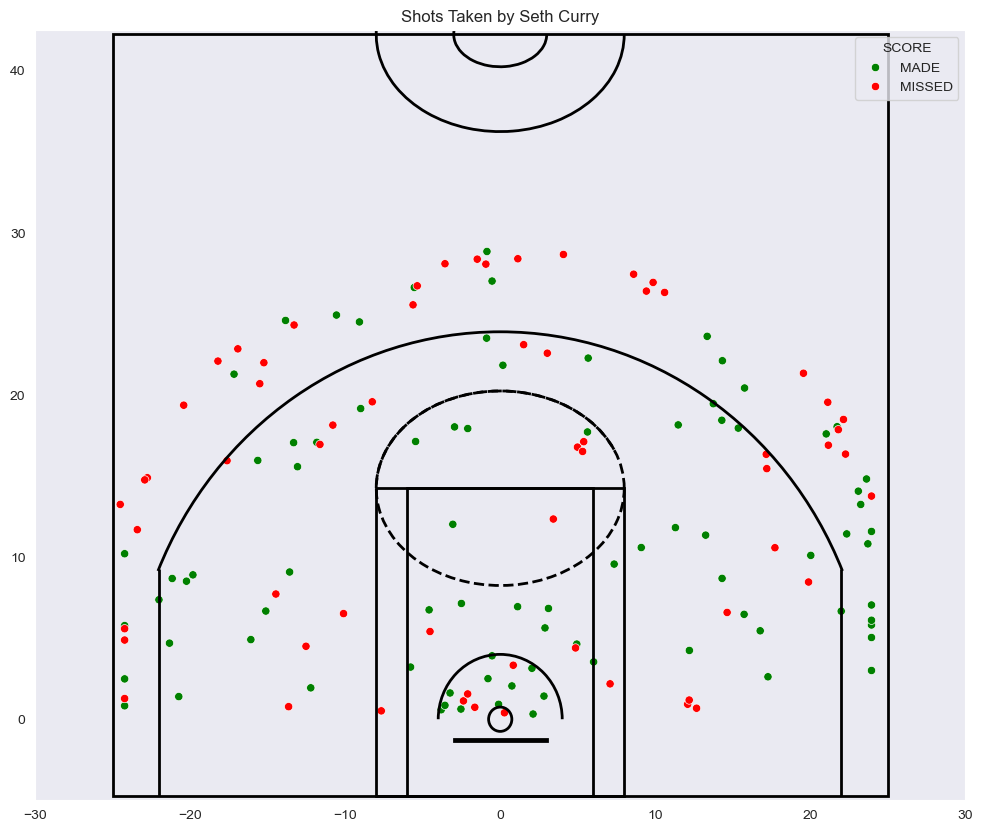

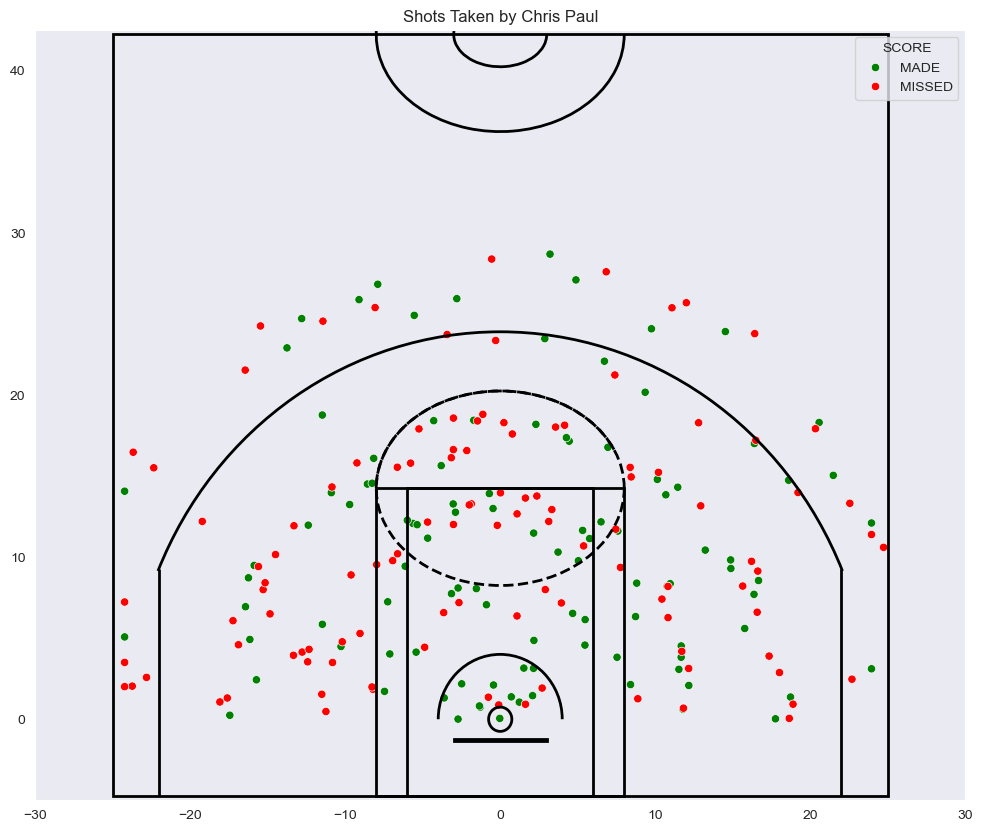

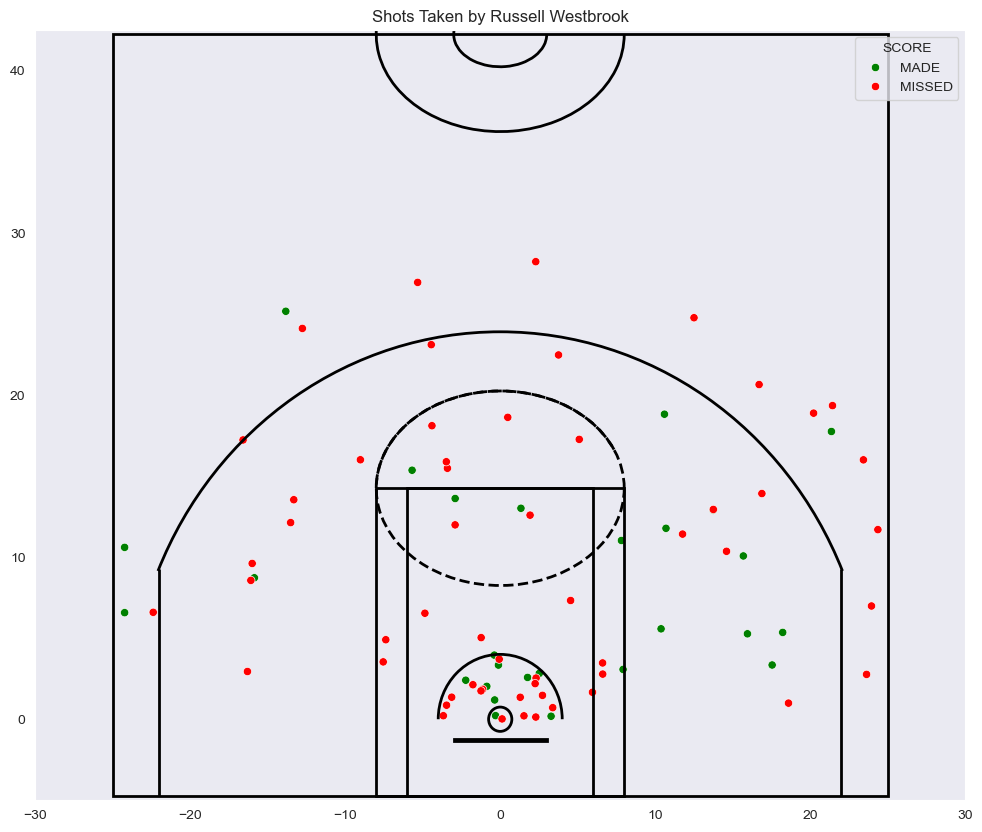

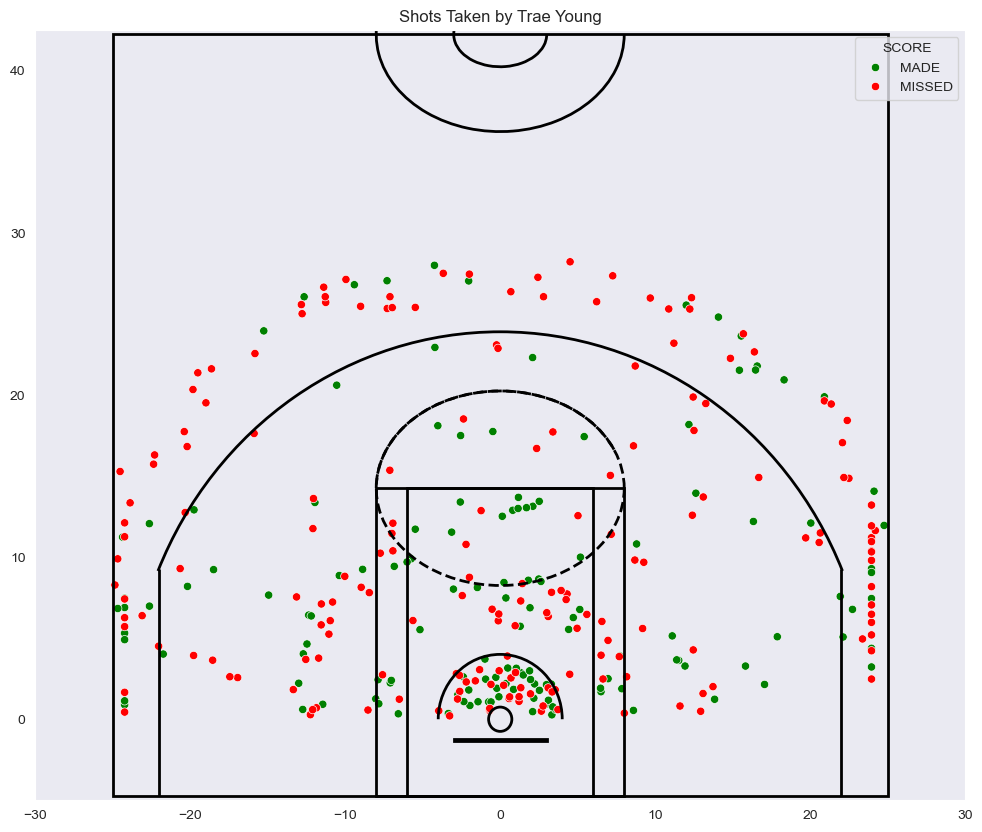

In [14]:
#Plotting the shots made/missed chart for each shooter

#Seth Curry
seth_plt= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Seth_Curry_S, x='X', y=trueY, hue='SCORE', palette={'Green', 'Red'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Taken by Seth Curry')
plt.show()

#Chris Paul
chris_plt= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Chris_Paul_S, x='X', y=trueY, hue='SCORE', palette={'Green', 'Red'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Taken by Chris Paul')
plt.show()

#Russell Westbrook
russ_plt= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Russell_Westbrook_S, x='X', y=trueY, hue='SCORE', palette={'Green', 'Red'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Taken by Russell Westbrook')
plt.show()

#Trae Young
trae_plt= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Trae_Young_S, x='X', y=trueY, hue='SCORE', palette={'Green', 'Red'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Taken by Trae Young')
plt.show()

### Where does each player shoot best?

In [15]:
#count of how many shots per shooter
count_shooter = nbadf["SHOOTER"].value_counts()
count_shooter

SHOOTER
Trae Young           329
Chris Paul           216
Seth Curry           147
Russell Westbrook     84
Name: count, dtype: int64

,INDEX,SHOOTER,X,Y,RANGE,DEFENDER,SCORE,Exact_Range,FGpct,FG_zones
592,592,Trae Young,-1.234030,17.867246,"(10, 14)",Chris Paul,MISSED,17.909810,NaN,Long Range
440,440,Russell Westbrook,-5.326258,31.947323,"(25, 29)",Chris Paul,MISSED,32.388277,NaN,3 Point and Beyond
130,130,Seth Curry,-24.232052,9.884217,"(25, 29)",Russell Westbrook,MISSED,26.170405,NaN,3 Point and Beyond
761,761,Trae Young,-12.780995,30.015736,"(25, 29)",Russell Westbrook,MISSED,32.623584,NaN,3 Point and Beyond
396,396,Russell Westbrook,-7.382632,9.904613,"(5, 9)",Trae Young,MISSED,12.353324,NaN,Mid Range
423,423,Russell Westbrook,5.099071,22.263281,"(15, 19)",Trae Young,MISSED,22.839751,NaN,Long Range
295,295,Chris Paul,-5.242365,22.909392,"(15, 19)",Russell Westbrook,MISSED,23.501545,NaN,Long Range
125,125,Seth Curry,-22.765855,19.897506,"(25, 29)",Russell Westbrook,MISSED,30.235656,NaN,3 Point and Beyond
418,418,Russell Westbrook,14.599223,15.358934,"(15, 19)",Trae Young,MISSED,21.190427,NaN,Long Range
160,160,Chris Paul,-0.763570,6.358547,"(0, 4)",Trae Young,MISSED,6.404230,NaN,Short Range


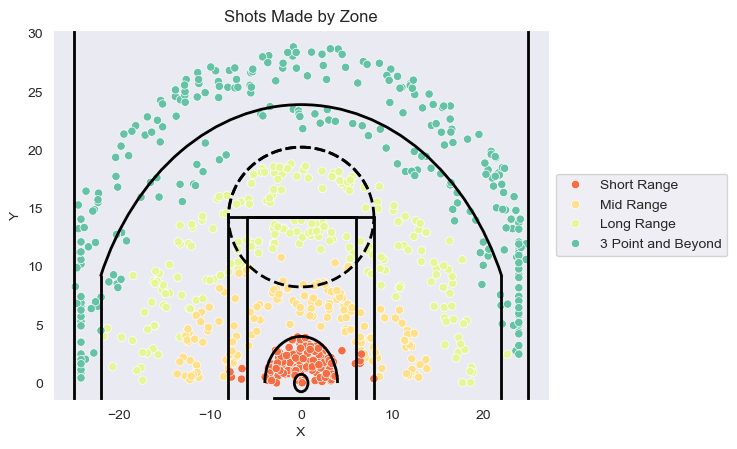

In [16]:
#Creating a Chart Representing All Shots Made per Zone
#create a variable with bins representing FG zones
nbadf['FG_zones'] = np.select(
    [
        nbadf.Exact_Range > 23.9,
        nbadf.Exact_Range > 16,
        nbadf.Exact_Range > 10,
        nbadf.Exact_Range > 3,
    ],
    [
        '3 Point and Beyond',
        'Long Range',
        'Mid Range',
        'Short Range',
    ],
    default='Under the Basket'
)

#visualize the plot
shots_by_zone = sns.scatterplot(x=nbadf.X, y=trueY, hue=nbadf.FG_zones, legend=True, palette='Spectral')
draw_court(outer_lines=True)
shots_by_zone.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.title("Shots Made by Zone");

#sample of the dat
nbadf.sample(15)

In [17]:
#count range shots
count_range = nbadf[["FG_zones", "SHOOTER"]].value_counts()
count_range

FG_zones            SHOOTER          
3 Point and Beyond  Trae Young           126
Long Range          Chris Paul           105
3 Point and Beyond  Seth Curry            86
Mid Range           Trae Young            77
Short Range         Trae Young            71
Long Range          Trae Young            55
3 Point and Beyond  Chris Paul            49
Mid Range           Chris Paul            46
Long Range          Russell Westbrook     28
Short Range         Russell Westbrook     26
Long Range          Seth Curry            25
3 Point and Beyond  Russell Westbrook     21
Mid Range           Seth Curry            19
Short Range         Seth Curry            17
                    Chris Paul            16
Mid Range           Russell Westbrook      9
Name: count, dtype: int64

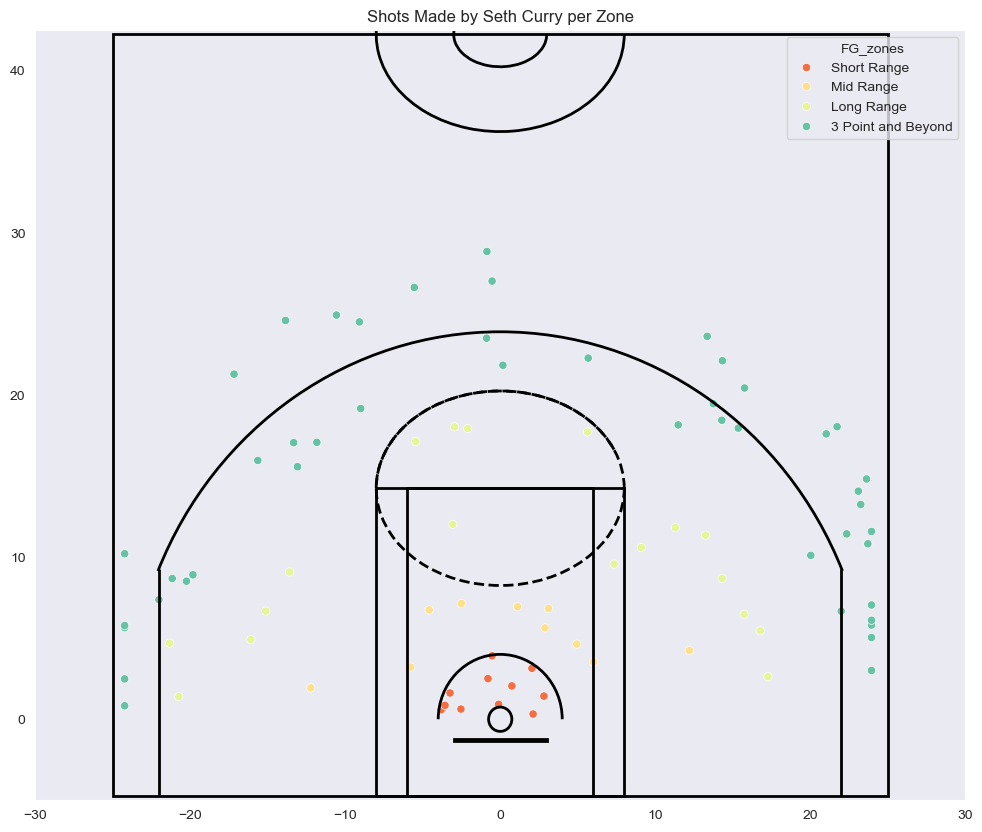

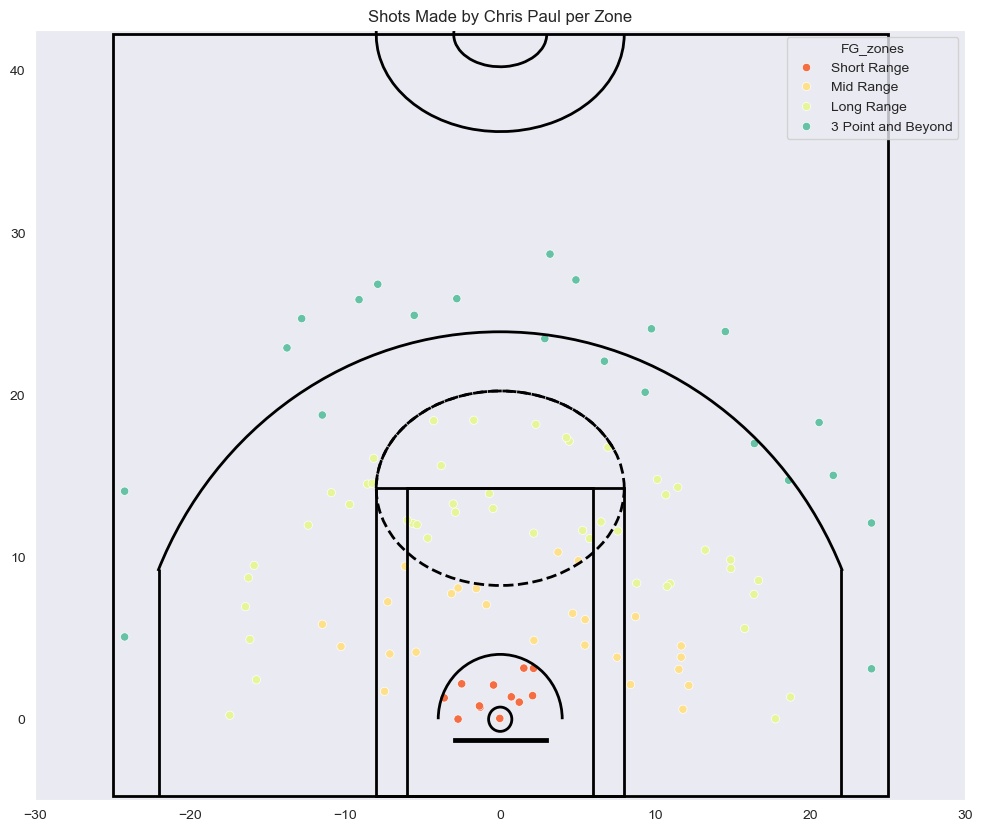

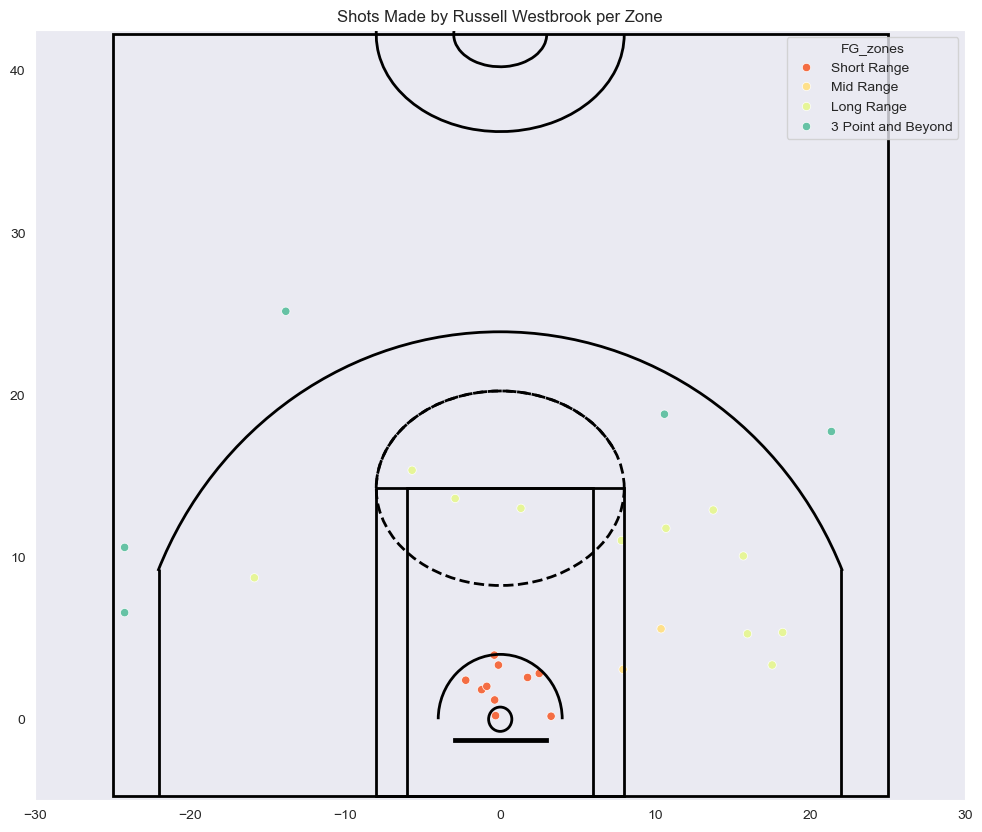

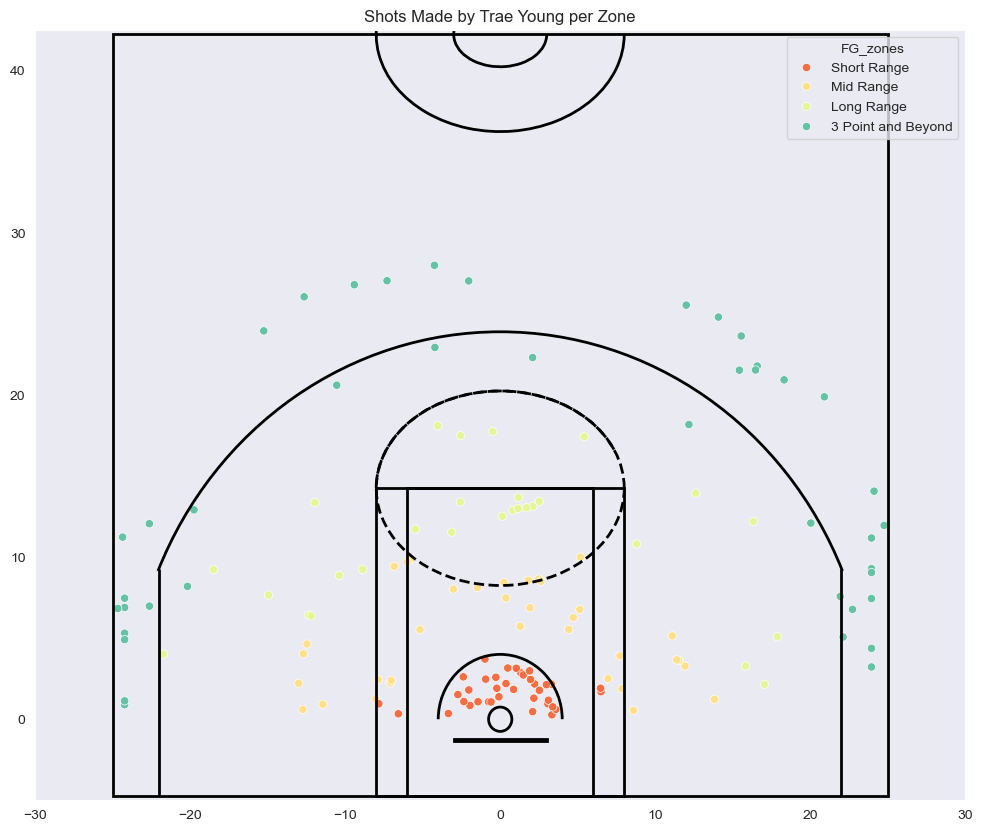

In [32]:
#plotting all shots made by each shooter

#Seth Curry
seth_plt_m= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=s, x='X', y=trueY, hue=nbadf.FG_zones, palette='Spectral')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Made by Seth Curry per Zone')
plt.show()

#Chris Paul
chris_plt_m= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=c, x='X', y=trueY, hue=nbadf.FG_zones, palette='Spectral')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Made by Chris Paul per Zone')
plt.show()

#Russell Westbrook
russ_plt_m= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=r, x='X', y=trueY, hue=nbadf.FG_zones, palette='Spectral')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Made by Russell Westbrook per Zone')
plt.show()

#Trae Young
trae_plt_m= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=t, x='X', y=trueY, hue=nbadf.FG_zones, palette='Spectral')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Made by Trae Young per Zone')
plt.show()

C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\1333943681.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values


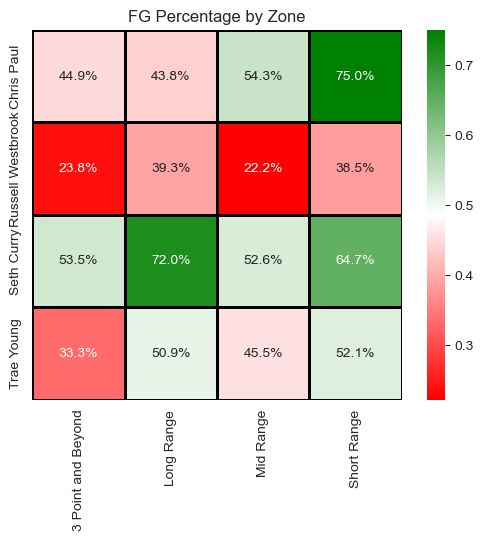

In [20]:
#import cmap that is ranged red to green
from matplotlib.colors import LinearSegmentedColormap

#Plot cmap for FG zones by Shooter
pct_by_zone = ( nbadf
 .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values
 .groupby(['SHOOTER','FG_zones'])  #group by SHOOTER and region
 .SCORE                            #grab the SCORE 
 .mean()                           #calculate the mean
 .unstack()                        #unstack
 .pipe(sns.heatmap, cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256), square=True, annot=True, linecolor='Black', linewidths=1,  fmt='.1%')
)
plt.xlabel(None)
plt.ylabel(None)
plt.title("FG Percentage by Zone");

### Who is the best defender?

C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\1309204545.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['MISSED','MADE'],[1,0]) #replace string with numeric values


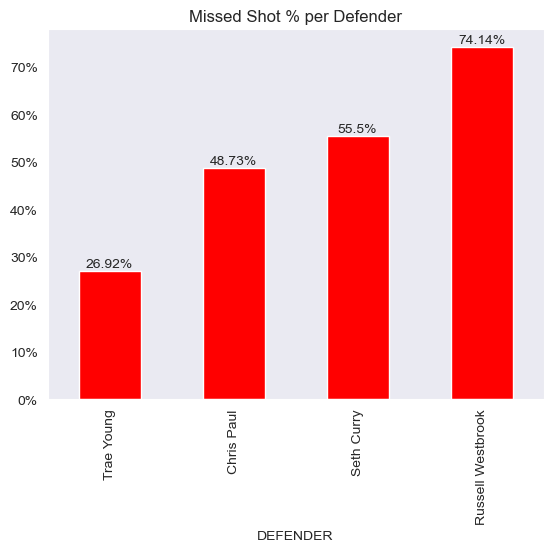

In [21]:
#Calculate Defensive Stops %
avg_field_goal_def = (nbadf
 .replace(['MISSED','MADE'],[1,0]) #replace string with numeric values
 .groupby('DEFENDER')              #group by Defender
 .SCORE                            #grab the score
 .mean()                           #calculate the mean
 .sort_values()                    #sort the means
)

#adding Defense Stops % as a column to the data frame
nbadf['DefPct'] = avg_field_goal_def 

#Plotting the Bar Graph
bar_plot_def = avg_field_goal_def.plot(kind='bar', color = ['r'])   #plot a bar graph of the sorted means
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))     #set y axis as percentage
plt.title("Missed Shot % per Defender")                             #set title

#Annotating the bars
for a in bar_plot_def.patches:
    txt = np.round(a.get_height() * 100, decimals=2)
    anot = txt.astype('str')
    bar_plot_def.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10,)

In [22]:
#Counting Defended Shots

count_defender = nbadf["DEFENDER"].value_counts()
count_defender

DEFENDER
Russell Westbrook    232
Chris Paul           197
Seth Curry           191
Trae Young           156
Name: count, dtype: int64

In [23]:
count_score = nbadf[["DEFENDER", "SCORE", "FG_zones"]].value_counts(ascending=True).reset_index(name='count')
count_score

,DEFENDER,SCORE,FG_zones,count
0,Trae Young,MISSED,3 Point and Beyond,7
1,Trae Young,MISSED,Short Range,8
2,Trae Young,MISSED,Mid Range,9
3,Russell Westbrook,MADE,Mid Range,10
4,Russell Westbrook,MADE,Short Range,11
5,Chris Paul,MISSED,Short Range,15
6,Trae Young,MADE,Short Range,16
7,Seth Curry,MISSED,Short Range,16
8,Russell Westbrook,MADE,Long Range,16
9,Chris Paul,MISSED,Mid Range,17


In [24]:
count_def_score = nbadf[["DEFENDER", "SHOOTER", "SCORE"]].value_counts(ascending=True).reset_index(name='count')
count_def_score

,DEFENDER,SHOOTER,SCORE,count
0,Seth Curry,Russell Westbrook,MADE,3
1,Trae Young,Seth Curry,MISSED,7
2,Chris Paul,Russell Westbrook,MADE,8
3,Russell Westbrook,Seth Curry,MADE,12
4,Trae Young,Russell Westbrook,MISSED,14
5,Trae Young,Russell Westbrook,MADE,17
6,Russell Westbrook,Chris Paul,MADE,17
7,Chris Paul,Seth Curry,MISSED,19
8,Seth Curry,Russell Westbrook,MISSED,19
9,Trae Young,Chris Paul,MISSED,21


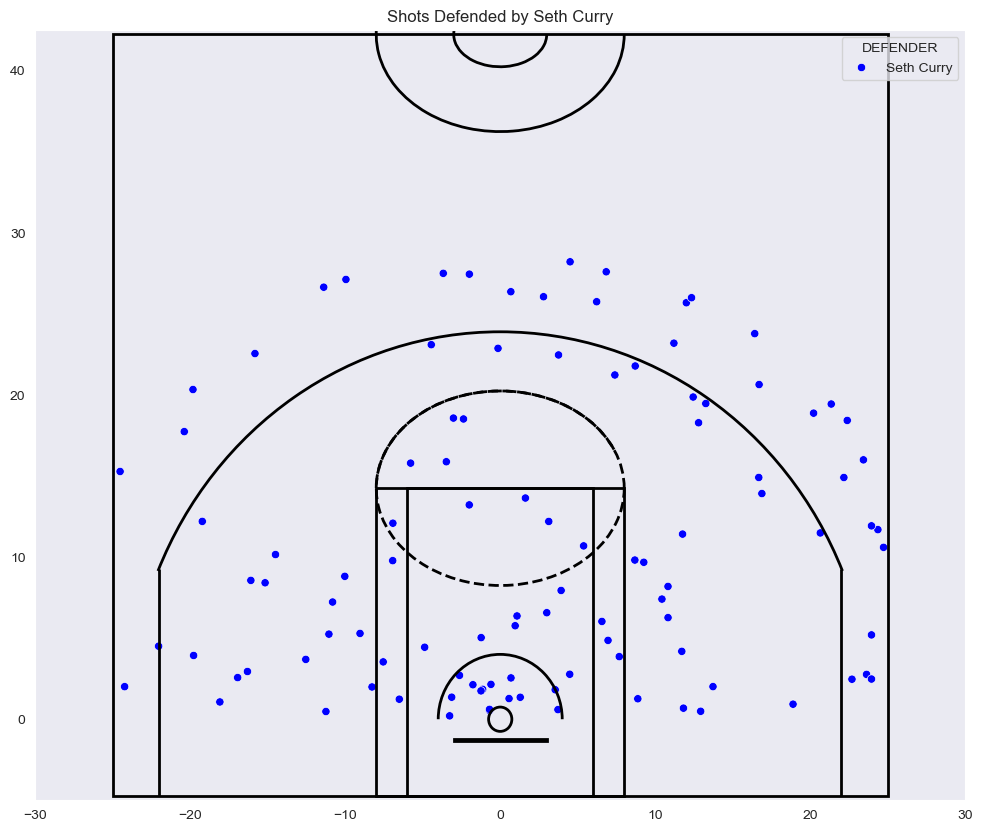

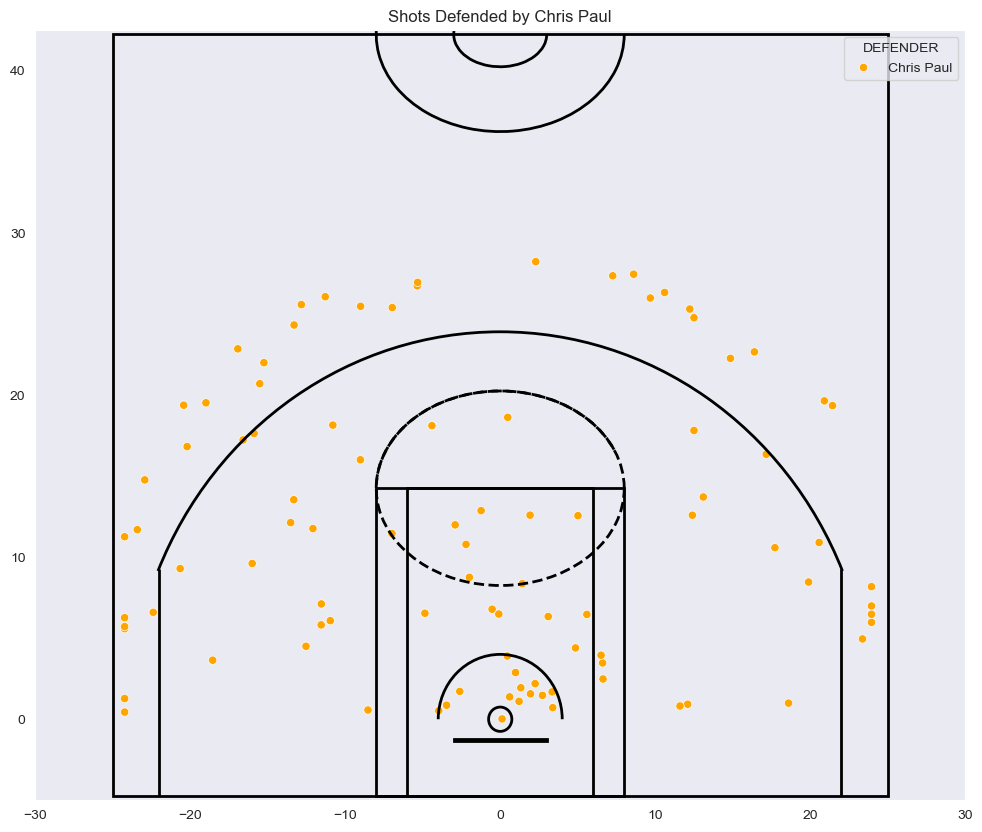

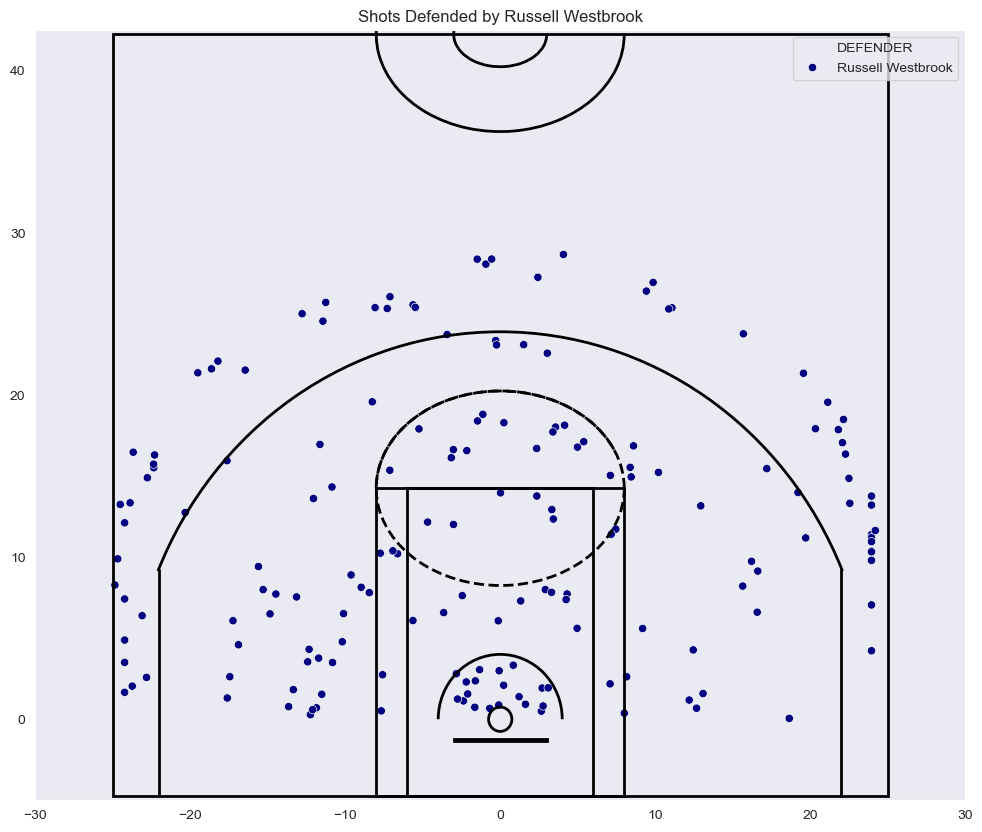

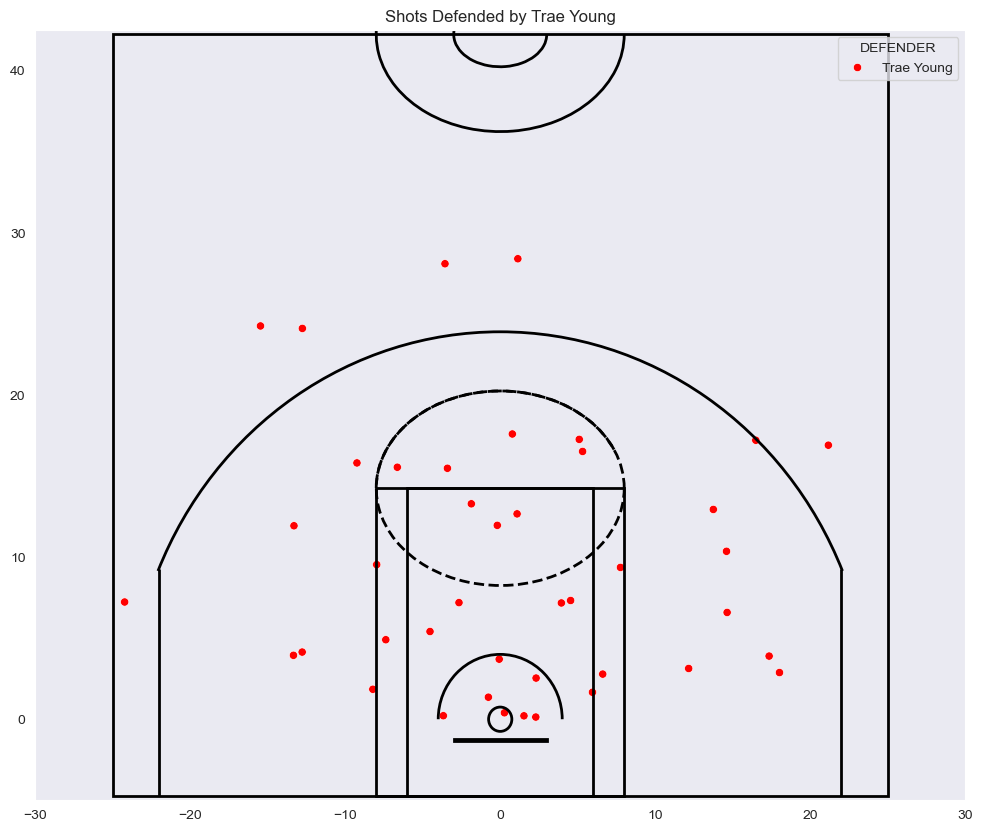

In [25]:
#Plotting shots defended by each defender

#Seth Curry
seth_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Seth_Curry_Defended, x='X', y=trueY, hue='DEFENDER', palette={'Blue'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Seth Curry')
plt.show()

#Chris Paul
chris_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Chris_Paul_Defended, x='X', y=trueY, hue='DEFENDER', palette={'Orange'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Chris Paul')
plt.show()

#Russell Westbrook
russ_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Russell_Westbrook_Defended, x='X', y=trueY, hue='DEFENDER', palette={'Navy'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Russell Westbrook')
plt.show()

#Trae Young
trae_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Trae_Young_Defended, x='X', y=trueY, hue='DEFENDER', palette={'Red'})
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Trae Young')
plt.show()

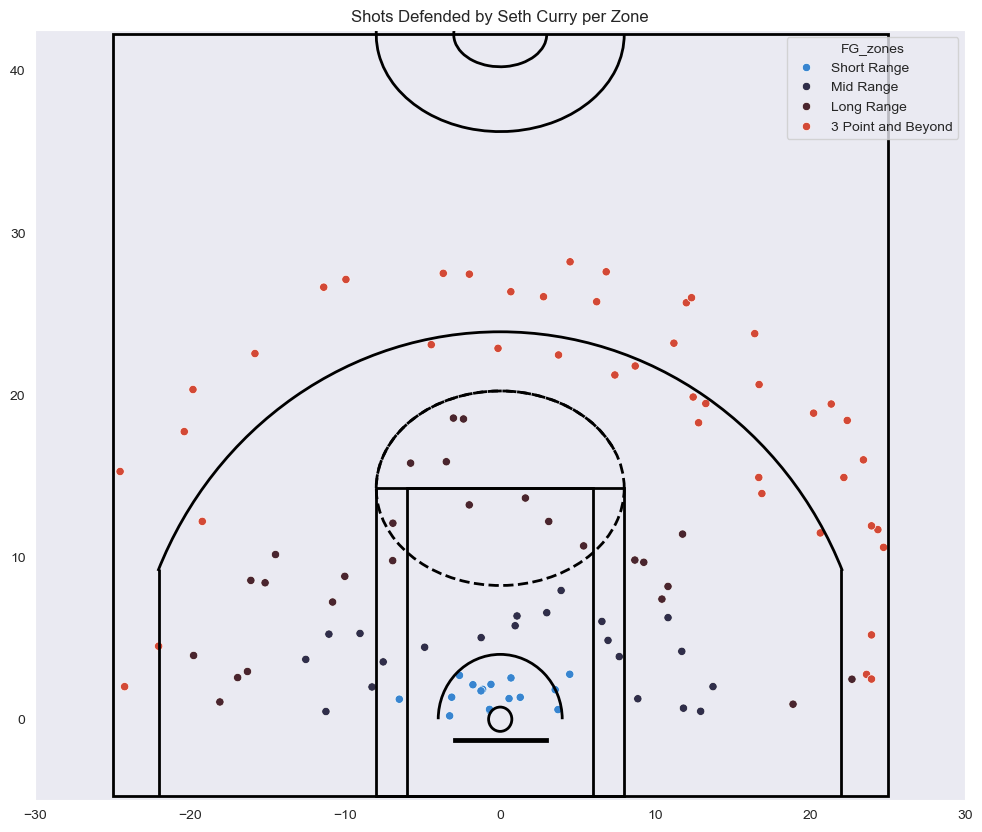

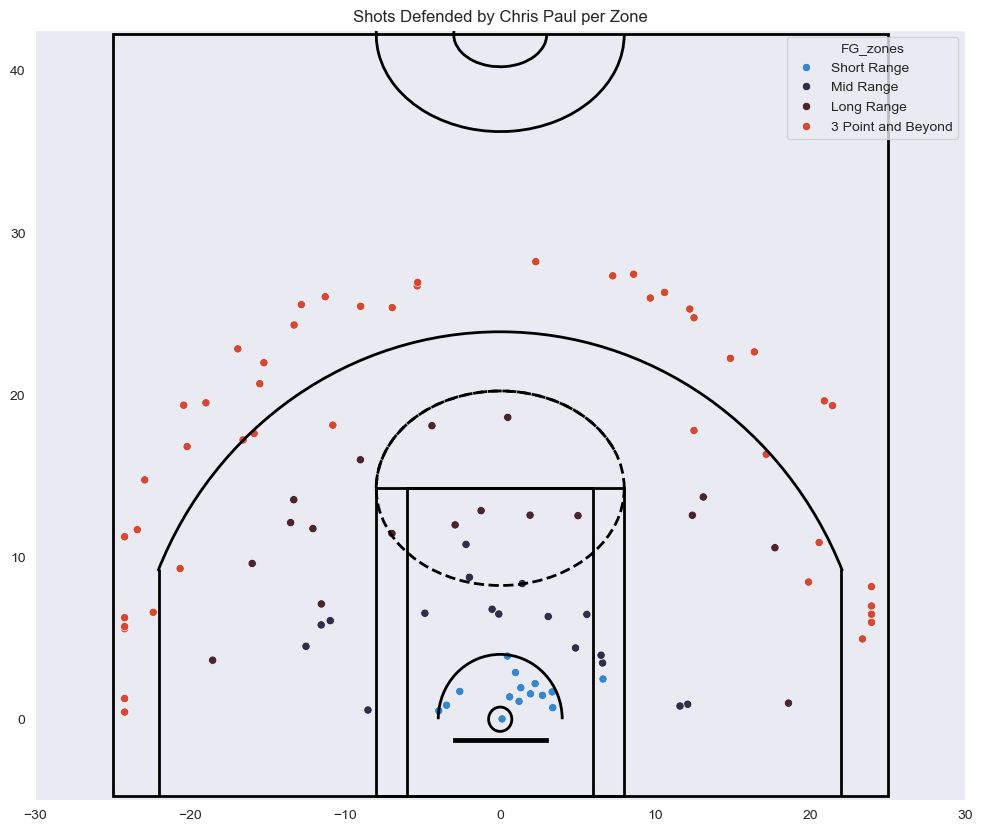

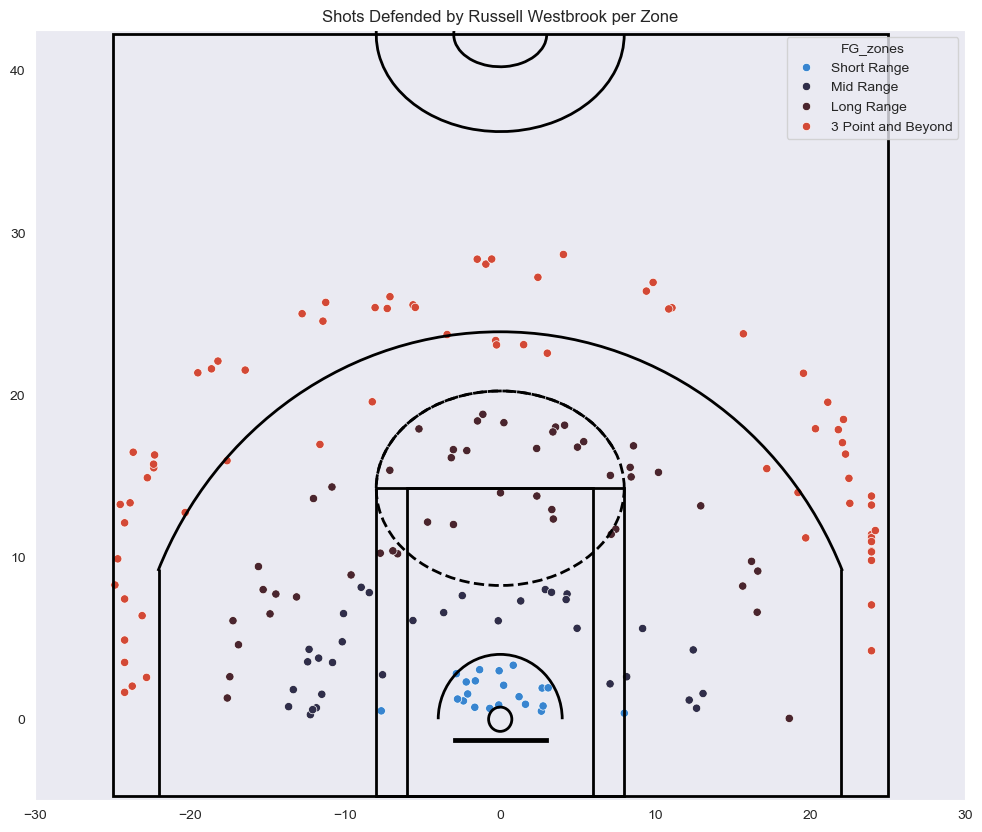

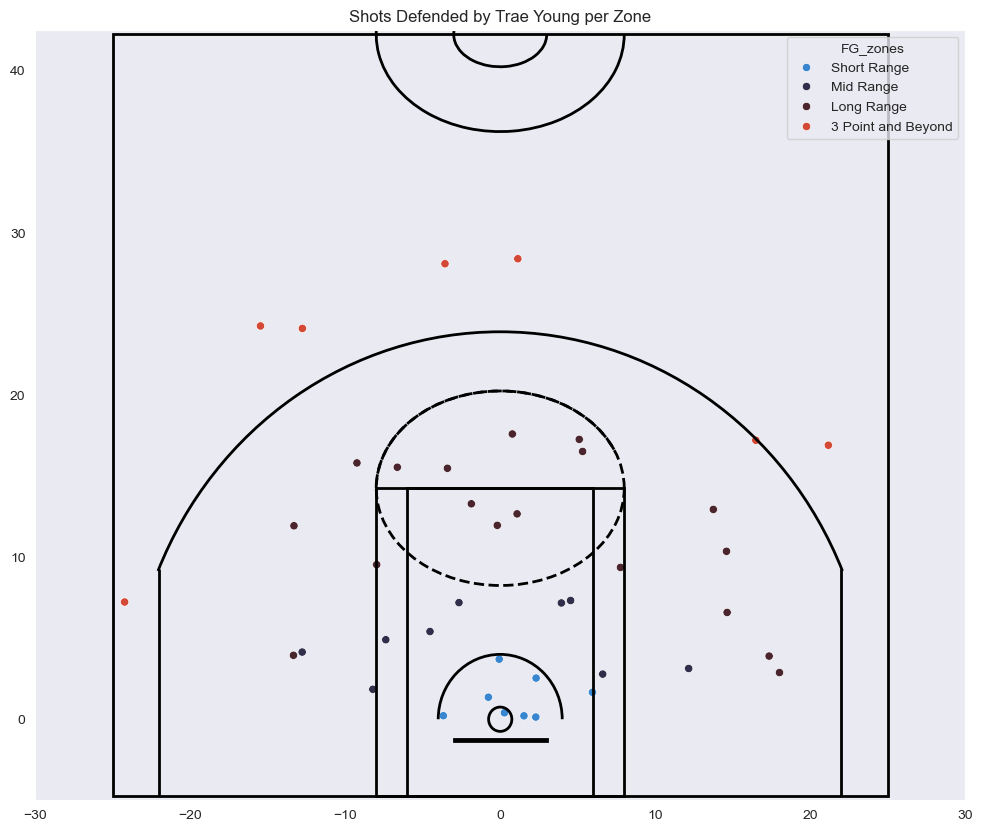

In [26]:
#Plotting shots defended by each defender by zone

#Seth Curry
seth_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Seth_Curry_Defended, x='X', y=trueY, hue=nbadf.FG_zones, palette='icefire')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Seth Curry per Zone')
plt.show()

#Chris Paul
chris_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Chris_Paul_Defended, x='X', y=trueY, hue=nbadf.FG_zones, palette='icefire')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Chris Paul per Zone')
plt.show()

#Russell Westbrook
russ_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Russell_Westbrook_Defended, x='X', y=trueY, hue=nbadf.FG_zones, palette='icefire')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Russell Westbrook per Zone')
plt.show()

#Trae Young
trae_plt_d= plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.scatterplot(data=Trae_Young_Defended, x='X', y=trueY, hue=nbadf.FG_zones, palette='icefire')
draw_court(outer_lines=True)
plt.xlim(-30,30)
plt.ylim(-5,42.5)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Shots Defended by Trae Young per Zone')
plt.show()

C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\3763990381.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values


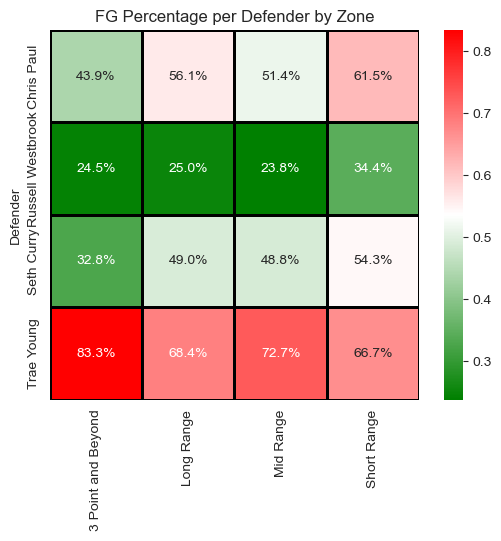

In [27]:
#import cmap that is ranged green to red
from matplotlib.colors import LinearSegmentedColormap

#Plot cmap for FG zones by Defender
def_pct_by_zone = ( nbadf
 .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values
 .groupby(['DEFENDER','FG_zones'])  #group by DEFENDER and FG_zones
 .SCORE                            #grab the SCORE 
 .mean()                           #calculate the mean
 .unstack()                        #unstack
 .pipe(sns.heatmap, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256), square=True, annot=True, linecolor='Black', linewidths=1,  fmt='.1%')
)
plt.xlabel(None)
plt.ylabel("Defender")
plt.title("FG Percentage per Defender by Zone");

### Is there a correlation between the efficiency of a shooter and the player who is defending them?

C:\Users\jacks\AppData\Local\Temp\ipykernel_4908\705837441.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values


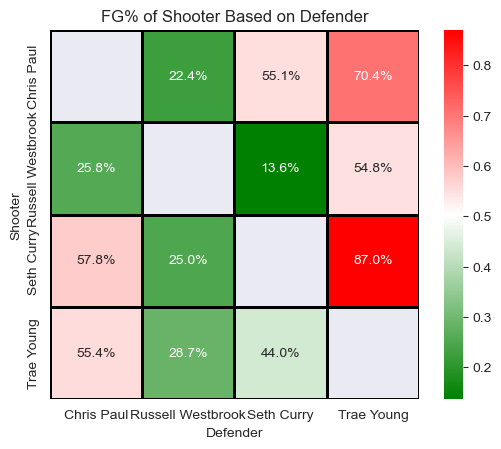

In [28]:
#Plot the cmap for FG% by 1 on 1 defense of shooters
pct_by_matchup = ( nbadf
 .replace(['MADE','MISSED'],[1,0]) #replace string with numeric values
 .groupby(['SHOOTER','DEFENDER'])  #group by SHOOTER and DEFENDER
 .SCORE                            #grab the SCORE 
 .mean()                           #calculate the mean
 .unstack()                        #unstack
 .pipe(sns.heatmap, cmap=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256), square=True, annot=True, linecolor='Black', linewidths=1,  fmt='.1%')
)

plt.xlabel("Defender")
plt.ylabel("Shooter")
plt.title("FG% of Shooter Based on Defender");

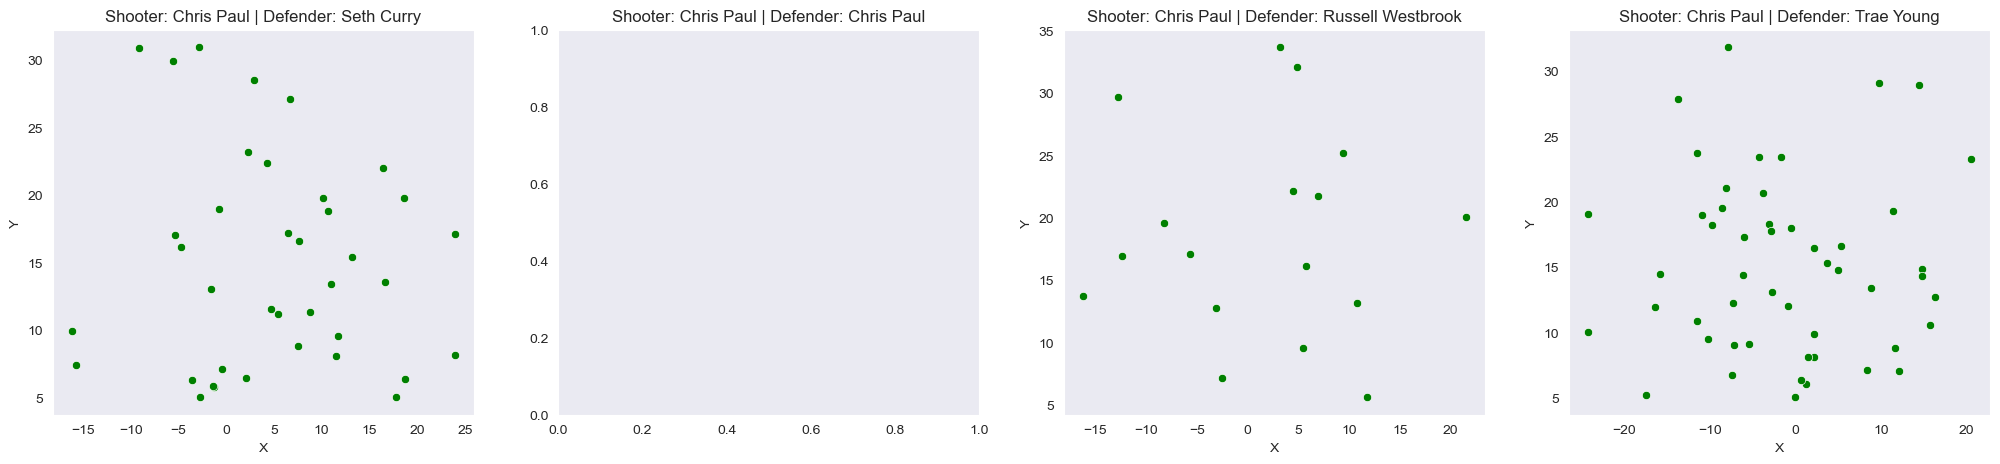

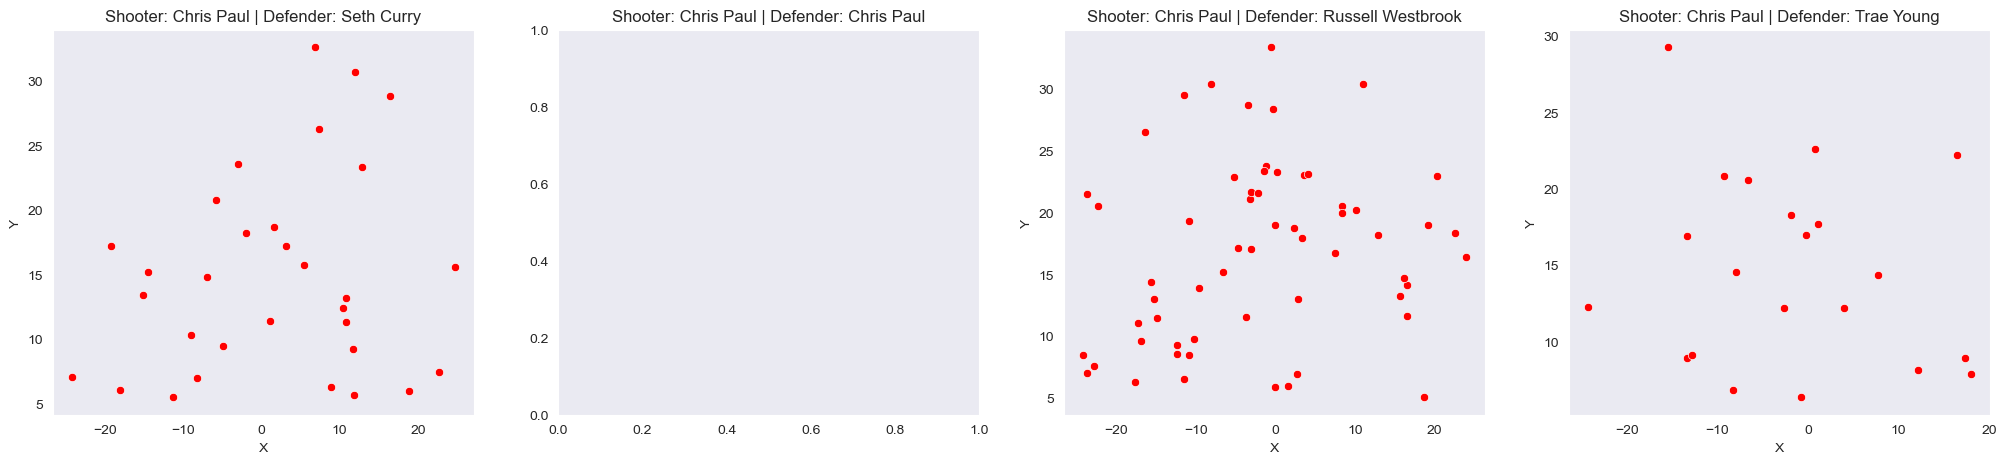

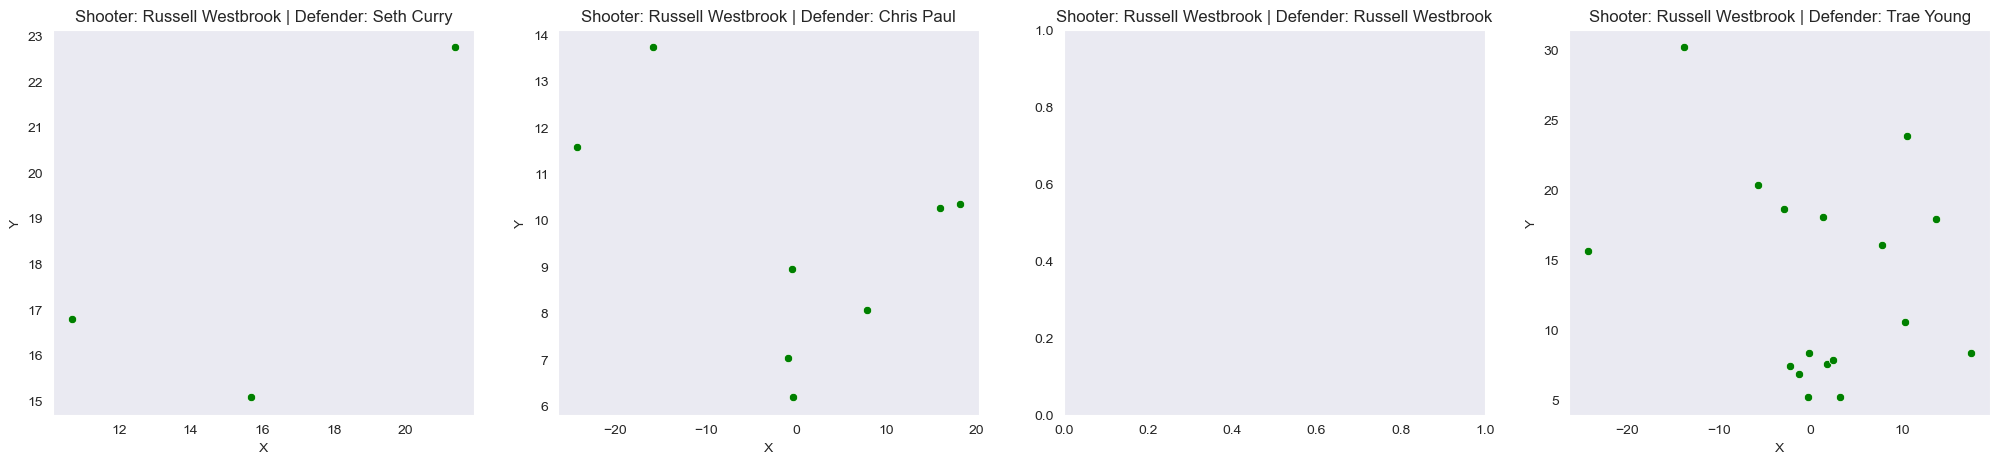

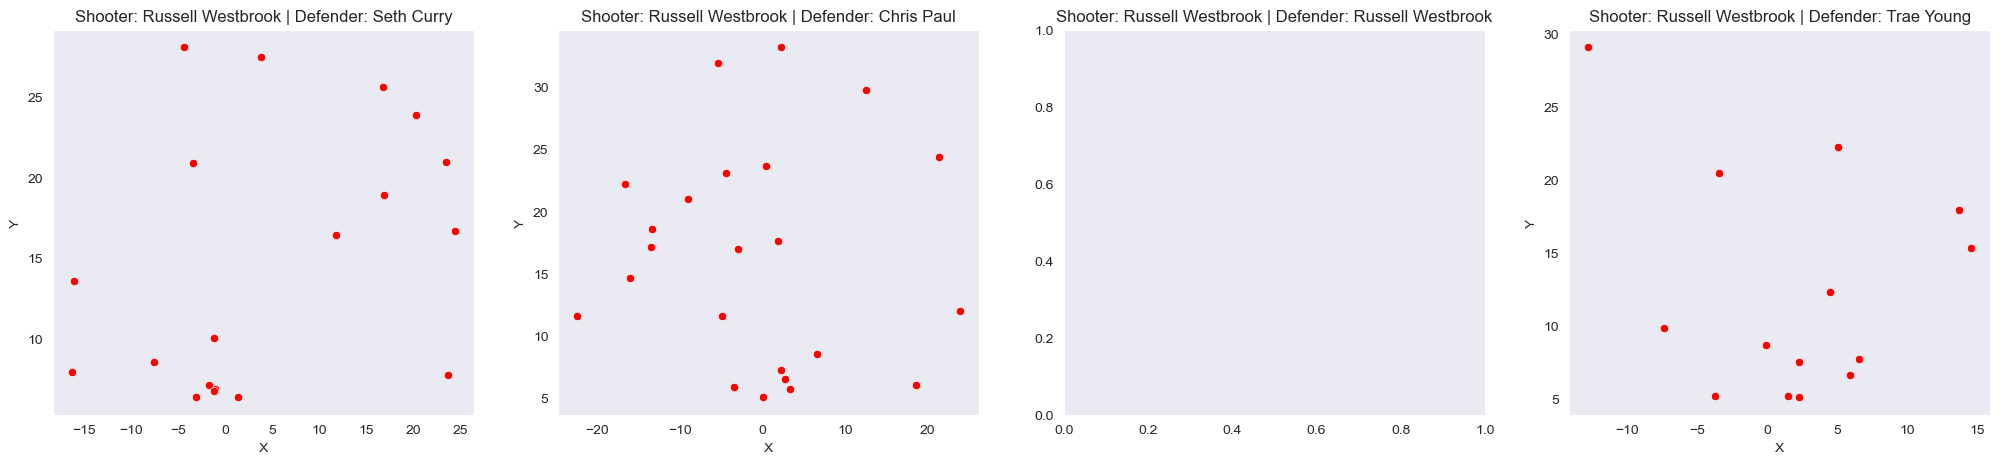

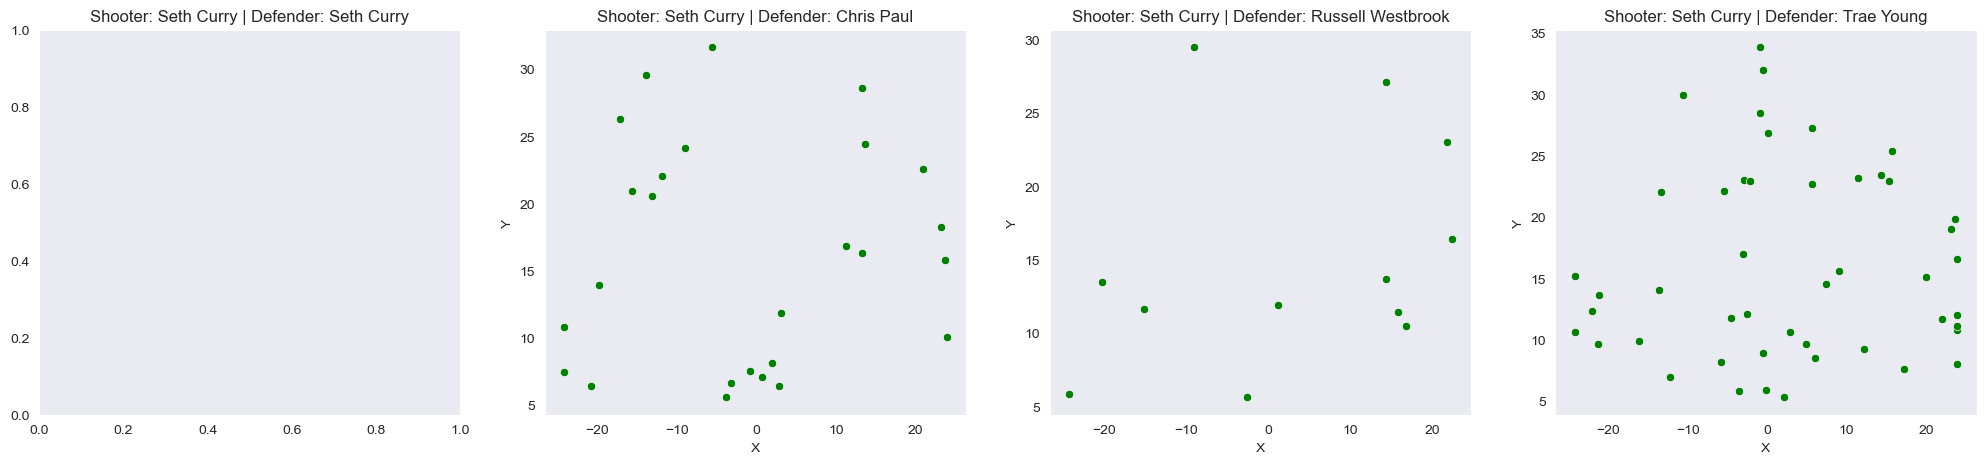

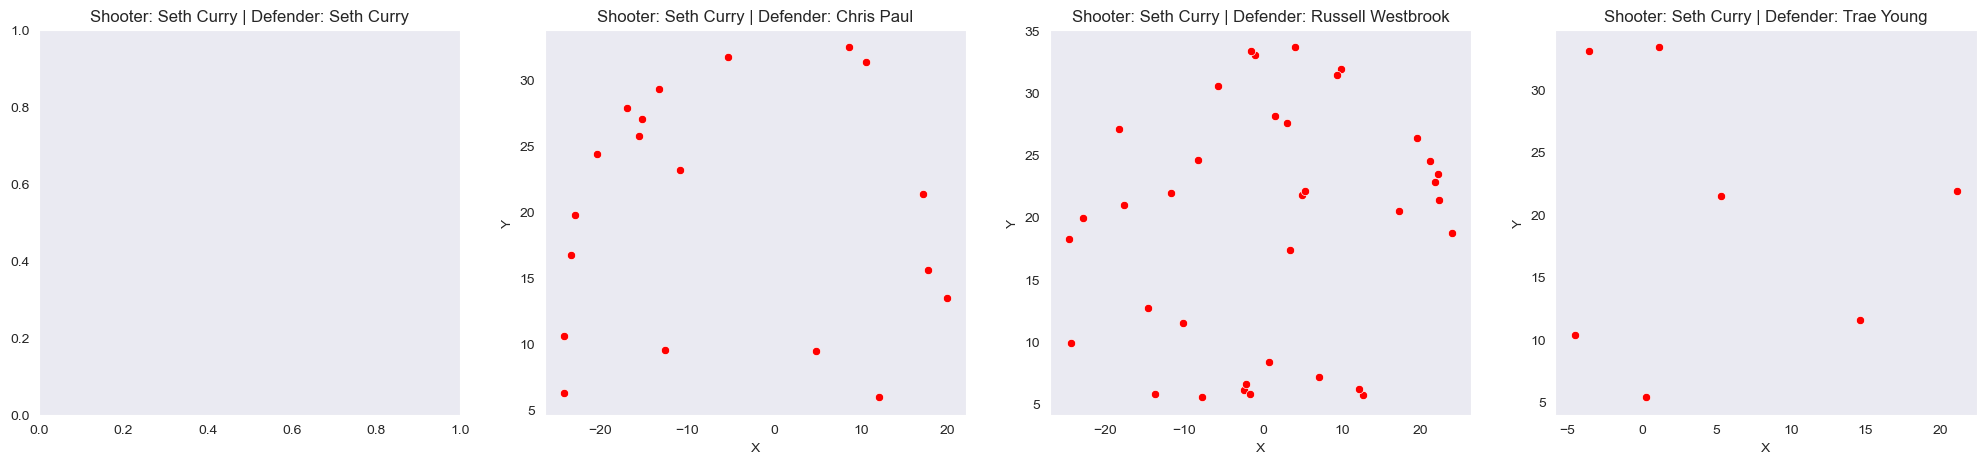

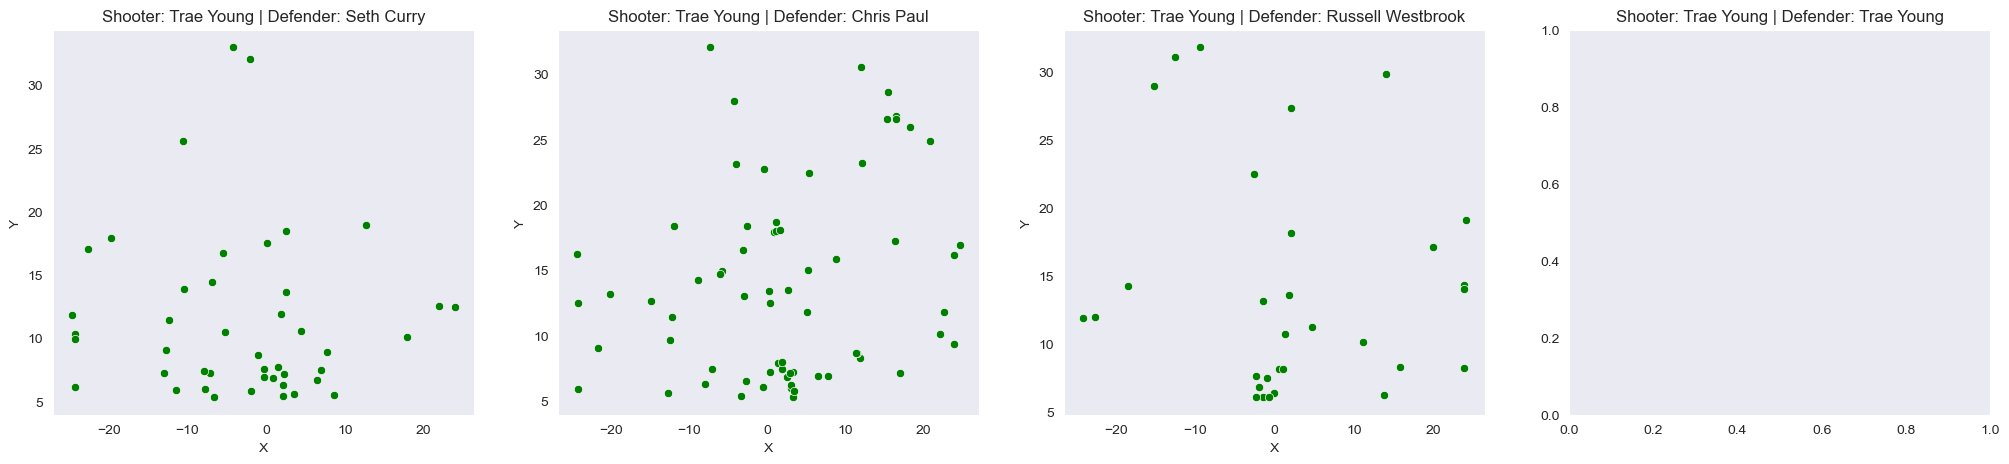

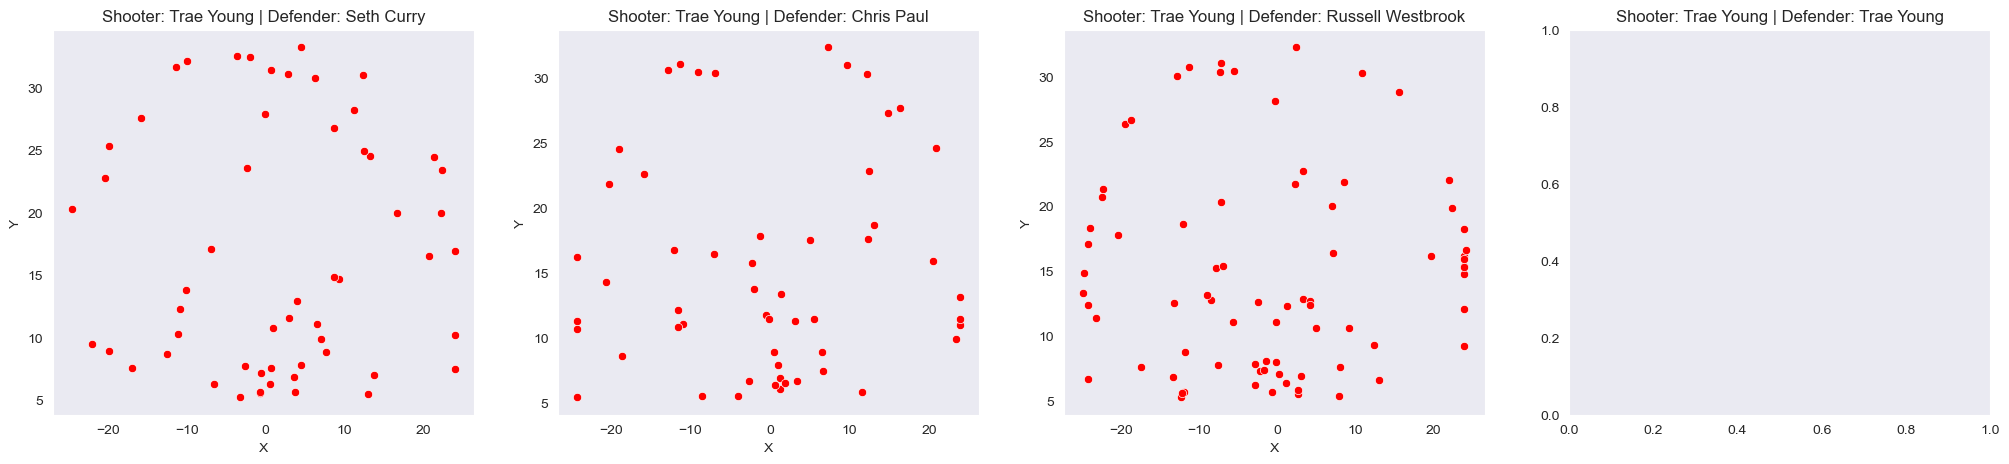

In [29]:
##Plotting Made/Missed Shots by (shooter) per (defender)

#Plotting Made shots by Chris Paul per Defender
figC1,axC1 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Chris Paul' & DEFENDER == @defender & SCORE == 'MADE'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axC1[i], color=['green'])
    axC1[i].set_title("Shooter: Chris Paul" + " | Defender: "+ defender);

#Plotting Missed shots by Chris Paul per Defender
figC2,axC2 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Chris Paul' & DEFENDER == @defender & SCORE == 'MISSED'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axC2[i], color=['red'])
    axC2[i].set_title("Shooter: Chris Paul" + " | Defender: "+ defender);

#Plotting Made shots by Russell Westbrook per Defender
figR1,axR1 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Russell Westbrook' & DEFENDER == @defender & SCORE == 'MADE'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axR1[i], color=['green'])
    axR1[i].set_title("Shooter: Russell Westbrook" + " | Defender: "+ defender);

#Plotting Missed shots by Russell Westbrook per Defender
figR2,axR2 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Russell Westbrook' & DEFENDER == @defender & SCORE == 'MISSED'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axR2[i], color= ['r'])
    axR2[i].set_title("Shooter: Russell Westbrook" + " | Defender: "+ defender);

#Plotting Made shots by Seth Curry per Defender
figS1,axS1 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Seth Curry' & DEFENDER == @defender & SCORE == 'MADE'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axS1[i], color=['green'])
    axS1[i].set_title("Shooter: Seth Curry" + " | Defender: "+ defender);

#Plotting Missed shots by Seth Curry per Defender
figS2,axS2 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Seth Curry' & DEFENDER == @defender & SCORE == 'MISSED'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axS2[i], color= ['r'])
    axS2[i].set_title("Shooter: Seth Curry" + " | Defender: "+ defender);

#Plotting Made shots by Trae Young per Defender
figT1,axT1 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Trae Young' & DEFENDER == @defender & SCORE == 'MADE'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axT1[i], color=['green'])
    axT1[i].set_title("Shooter: Trae Young" + " | Defender: "+ defender);

#Plotting Missed shots by Trae Young per Defender
figT2,axT2 = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
for i,defender in enumerate(nbadf.SHOOTER.unique()):
    data = nbadf.query("SHOOTER == 'Trae Young' & DEFENDER == @defender & SCORE == 'MISSED'")
    sns.scatterplot(data=data, x='X', y='Y', ax=axT2[i], color=['red'])
    axT2[i].set_title("Shooter: Trae Young" + " | Defender: "+ defender)

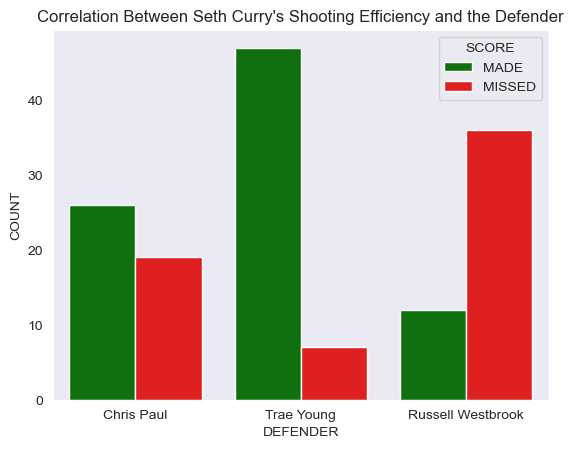

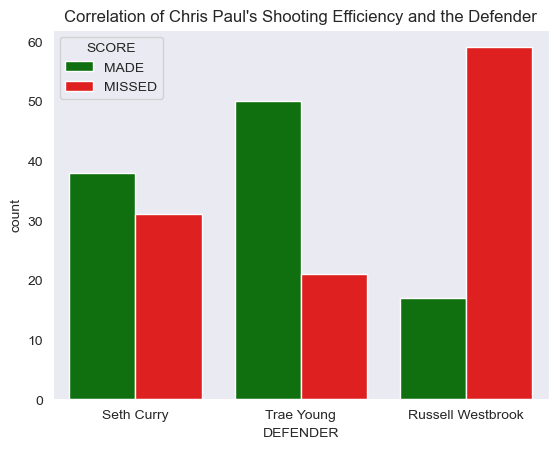

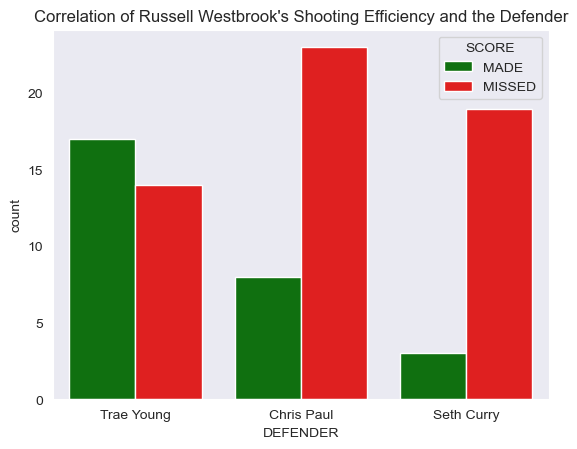

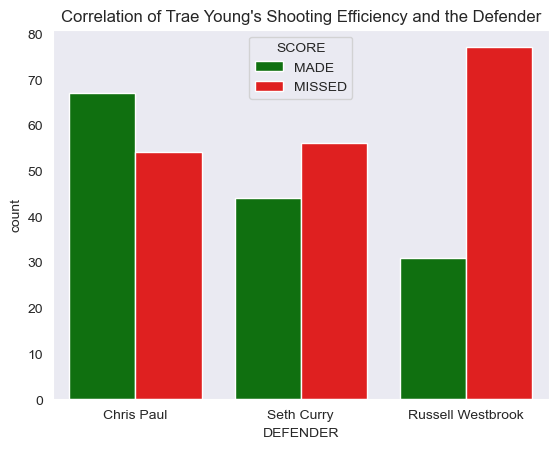

In [30]:
#Visualizing the Correlation between each Shooter's Efficiency and the Defender

#Seth Curry
sns.countplot(data=Seth_Curry_S, x='DEFENDER', hue='SCORE', palette={'Green', 'Red'});
plt.title("Correlation Between Seth Curry's Shooting Efficiency and the Defender");
plt.ylabel("COUNT")
plt.show()

#Chris Paul
sns.countplot(data=Chris_Paul_S, x='DEFENDER', hue='SCORE', palette={'Green', 'Red'});
plt.title("Correlation of Chris Paul's Shooting Efficiency and the Defender");
plt.show()

#Russell Westbrook
sns.countplot(data=Russell_Westbrook_S, x='DEFENDER', hue='SCORE', palette={'Green', 'Red'});
plt.title("Correlation of Russell Westbrook's Shooting Efficiency and the Defender");
plt.show()

#Trae Young
sns.countplot(data=Trae_Young_S, x='DEFENDER', hue='SCORE', palette={'Green', 'Red'});
plt.title("Correlation of Trae Young's Shooting Efficiency and the Defender");
plt.show()